## Simple linear regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [22]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [24]:
rooms = 2*np.random.rand(100, 1)+3

rooms[1:10]

array([[4.66810159],
       [4.92280439],
       [3.31242381],
       [3.05285051],
       [4.16231259],
       [4.37226506],
       [3.73502093],
       [4.79568645],
       [3.64077677]])

In [28]:
price = 265 + 6 * rooms + abs(np.random.randn(100, 1))
price[1:10]

array([[293.40777298],
       [296.13906365],
       [284.87607178],
       [283.38905709],
       [290.84453923],
       [293.45942467],
       [287.49843344],
       [294.33439858],
       [287.25986566]])

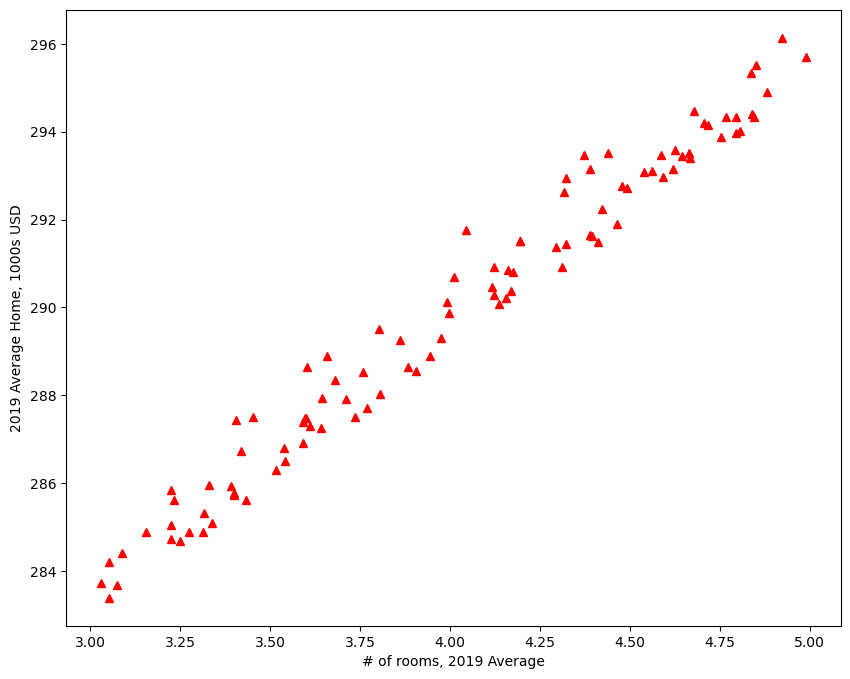

In [30]:
plt.plot(rooms, price, 'r^')
plt.xlabel("# of rooms, 2019 Average")
plt.ylabel("2019 Average Home, 1000s USD")
plt.show()

In [36]:
x = rooms
y = price

LinReg = LinearRegression()
LinReg.fit(x, y)
print (LinReg.intercept_, LinReg.coef_)

[265.51998111] [[6.06495809]]


Simple Algebra

- y = mx + b
- b = intercept = 265.5

Estimated Coefficients

- LinReg.coef_ = [6.06] Estimated coefficients for the terms in the linear regression problem

In [41]:
print(LinReg.score(x, y))

0.972211564924064


## Multiple Linear Regression



In [48]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [289]:
import seaborn as sb
sb.set_style("whitegrid")
from collections import Counter
             

In [12]:
address = '~/Documents/Python/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/enrollment_forecast.csv'

enroll = pd.read_csv(address)

enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()


,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [7]:
import numpy as np
import pandas as pd
 
import matplotlib as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
%matplotlib inline
rcParams ['figure.figsize'] = 5, 4

In [9]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [12]:
address = '~/Documents/Python/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


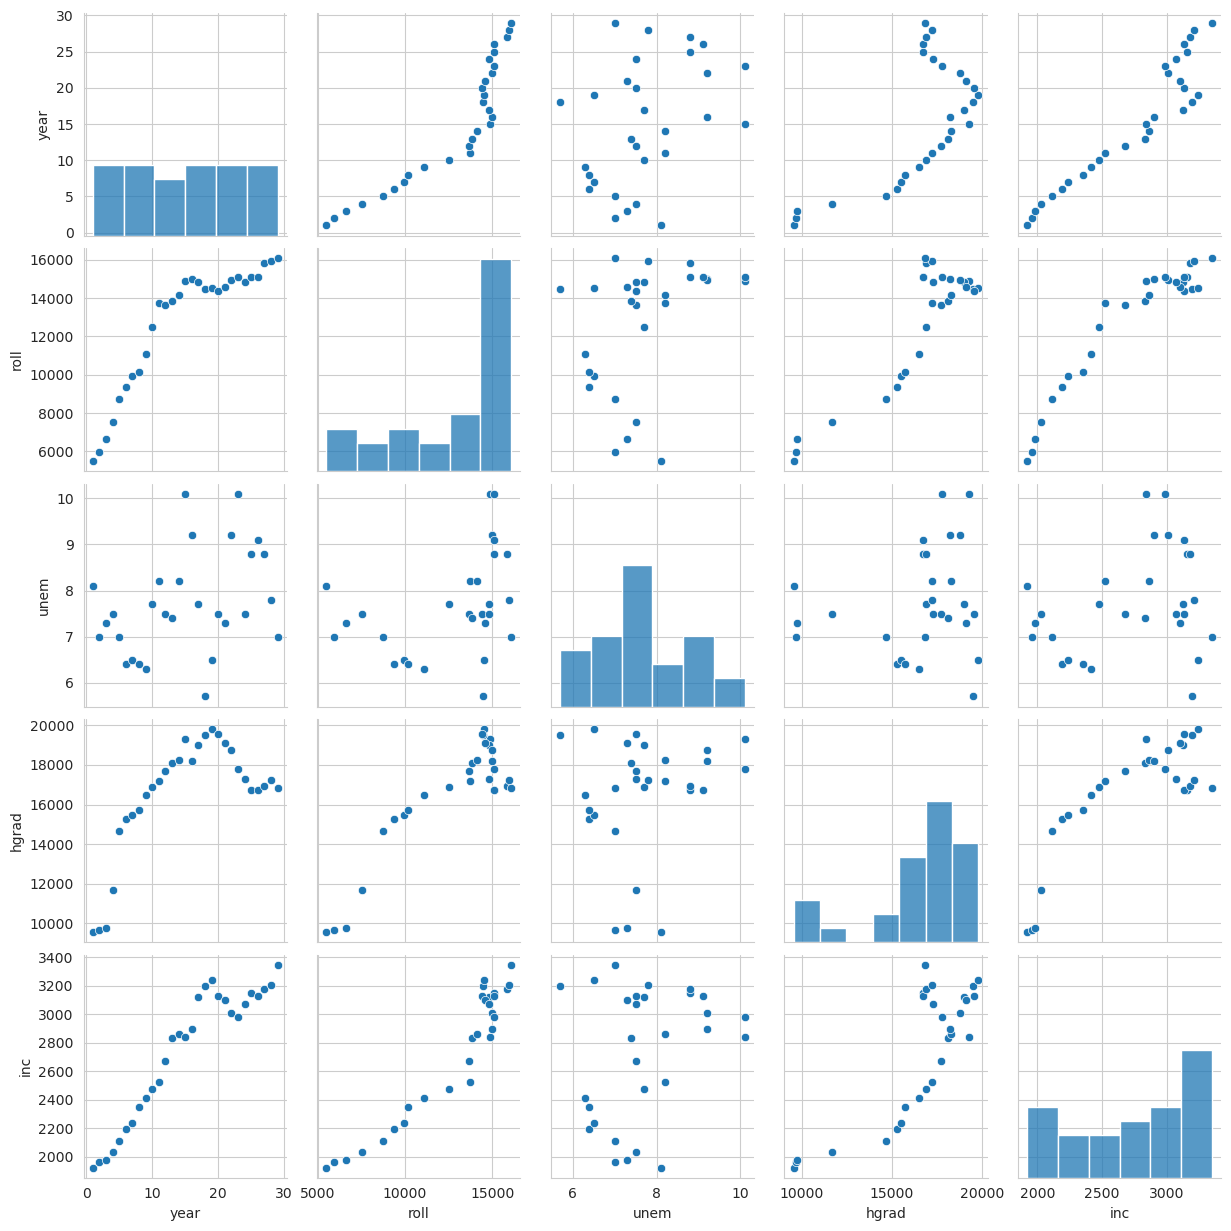

In [15]:
sb.pairplot(enroll)

In [16]:
print (enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [17]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

In [18]:
missing_valuse = X==np.NAN
X[missing_valuse ==True]

array([], dtype=float64)

In [19]:
LinRag = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
LinRag.fit(X, y)

print (LinRag.score(X, y))

0.8488812666133723


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [28]:
address = '~/Documents/Python/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/titanic-training-data.csv'

titanic_training = pd.read_csv(address)
titanic_training.columns = ['PassengerID', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
print(titanic_training.head())



   PassengerID  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [30]:
print (titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


/tmp/ipykernel_48691/3044143226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = 'Survived', data = titanic_training, palette = 'hls')


<Axes: xlabel='Survived', ylabel='count'>

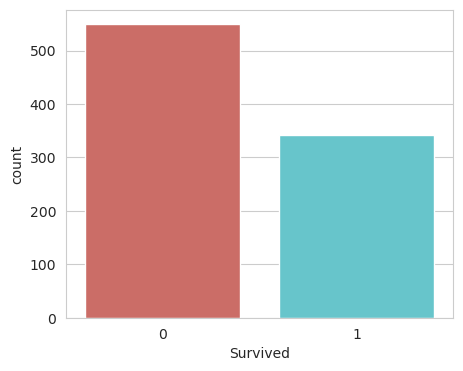

In [32]:
sb.countplot(x = 'Survived', data = titanic_training, palette = 'hls')

In [34]:
titanic_training.isnull(). sum()

PassengerID      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
titanic_training.describe()

,PassengerID,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
titanic_data = titanic_training.drop(['Name', 'Cabin'], axis = 1)
print (titanic_data.head())

   PassengerID  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


/tmp/ipykernel_48691/1622847318.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Parch', y ='Age', data = titanic_data, palette = 'hls')


<Axes: xlabel='Parch', ylabel='Age'>

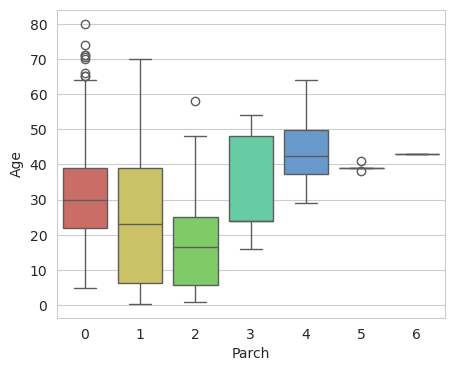

In [42]:
sb.boxplot(x='Parch', y ='Age', data = titanic_data, palette = 'hls')

In [44]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
def age_approx(cols):
    Age = cols [0]
    Parch = cols [1]

    if pd.isnull(Age):
        if Parch == 0 :
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
    else:
        return Age

In [49]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull() . sum()

NameError: name 'age_approx' is not defined

In [51]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop = True)
print (titanic_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 55.8+ KB
None


In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [55]:
titanic_data.head()

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [57]:
# 1 = male / 0 = female
gender_DF = pd.DataFrame(gender_encoded, columns = ['male_gender'])
gender_DF.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [59]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform (embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2])

In [61]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories = 'auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [63]:
# titanic_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
titanic_data.head()

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [65]:
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_DF], axis = 1, verify_integrity = True).astype(float)
titanic_dmy[0:5]

ValueError: could not convert string to float: 'male'

In [67]:

sb.heatmapt(titanic_dmy.corr())

AttributeError: module 'seaborn' has no attribute 'heatmapt'

In [69]:
 X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                     titanic_dmy['Survived'], test_size=20,
                                                     random_state=200)

NameError: name 'titanic_dmy' is not defined

In [71]:
X_train[0:5]

NameError: name 'X_train' is not defined

In [ ]:
LogRag = LogisticRegression(solver ='liblinea')
LogRag.fit(X_train)

# K-Means Use Clustering

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [76]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [86]:
iris = datasets.load_iris()
X = scale(iris.data)
y = pd.DataFrame(iris.target)
cariable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [96]:
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [100]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Target']

Text(0.5, 1.0, 'KMean Classification')

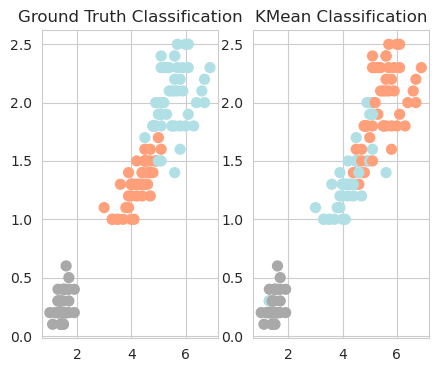

In [108]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[iris.target], s = 50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[clustering.labels_], s = 50)
plt.title('KMean Classification')



Text(0.5, 1.0, 'KMean Classification')

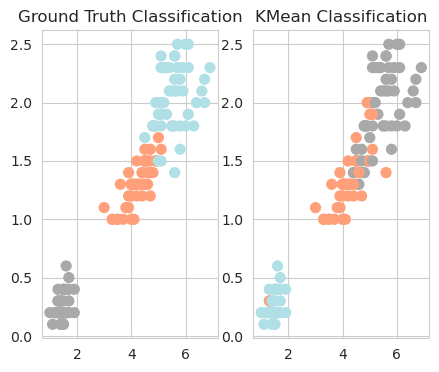

In [112]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[iris.target], s = 50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[relabel], s = 50)
plt.title('KMean Classification')

In [114]:
print (classification_report(y, relabel))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.80      0.74      0.77        50
           2       0.00      0.00      0.00        50

    accuracy                           0.25       150
   macro avg       0.27      0.25      0.26       150
weighted avg       0.27      0.25      0.26       150



 $Hierarchical Clustering$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams  
import seaborn as sb  
import sklearn
from sklearn import metrics as sm  

In [5]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import cophenet, linkage
from scipy.spatial.distance import pdist

In [7]:
np.set_printoptions(precision = 4, suppress =True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<Figure size 1000x300 with 0 Axes>

In [9]:
address = '~/Documents/Python/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'ys', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values


y = cars.iloc[:,(9)].values

In [11]:
z = linkage(X, 'ward')

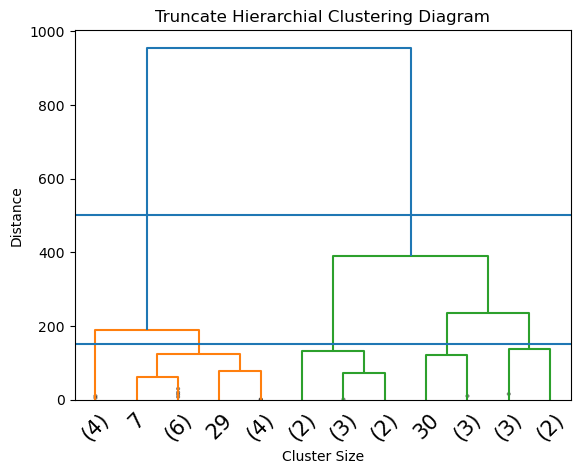

In [13]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncate Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [15]:
k = 2
HClustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
HClustering.fit(X)

sm.accuracy_score(y, HClustering.labels_)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [59]:
import pandas as pd
import matplotlib as plt
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn 
from sklearn.cluster import DBSCAN
from collections import Counter

In [23]:
%matplotlib inline 
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [35]:
address = '~/Documents/Python/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/iris.data.csv'

df = pd.read_csv(address)

# iris_df = pd.DataFrame(iris.data)
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
# y.columns = ['Target']
data = df.iloc[:,0:4].values
target = df.iloc[:,4].values
df[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [43]:
model = DBSCAN(eps=0.8, min_samples = 19).fit(data)
print (model)

DBSCAN(eps=0.8, min_samples=19)


In [51]:
outliers_df = pd.DataFrame(data)

print (Counter(model.labels_))

print (outliers_df[model.labels_ ==-1])

Counter({1: 94, 0: 49, -1: 6})
       0    1    2    3
97   5.1  2.5  3.0  1.1
104  7.6  3.0  6.6  2.1
116  7.7  3.8  6.7  2.2
117  7.7  2.6  6.9  2.3
121  7.7  2.8  6.7  2.0
130  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

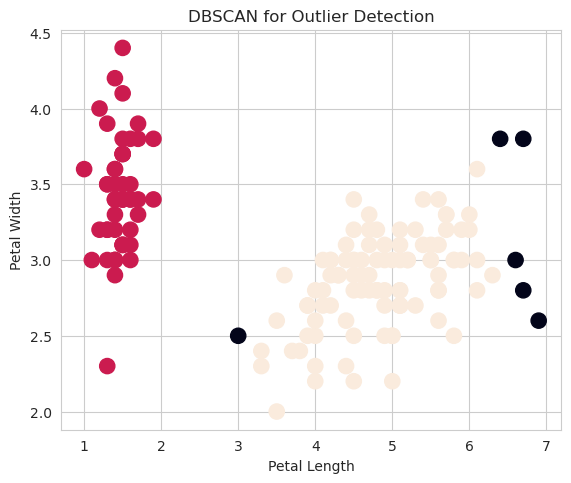

In [69]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c = colors, s=120)
ax.set_xlabel ('Petal Length')
ax.set_ylabel ('Petal Width')
plt.title ('DBSCAN for Outlier Detection')

In [79]:
import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

In [83]:
iris = datasets.load_iris()

X = iris.data
variable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [87]:
factor = FactorAnalysis().fit(X)

DF = pd.DataFrame(factor.components_, columns= variable_names)
print (DF)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


In [89]:
from IPython.display import Image
from IPython. core.display import HTML

In [105]:
from sklearn.decomposition import PCA

In [107]:
irirs = datasets.load_iris()
C = iris.data
variable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [113]:
pca = sklearn.decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.9246, 0.0531, 0.0171, 0.0052])

In [115]:
pca.explained_variance_ratio_.sum()

1.0

In [117]:
comps = pd.DataFrame(pca.components_, columns = variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<Axes: >

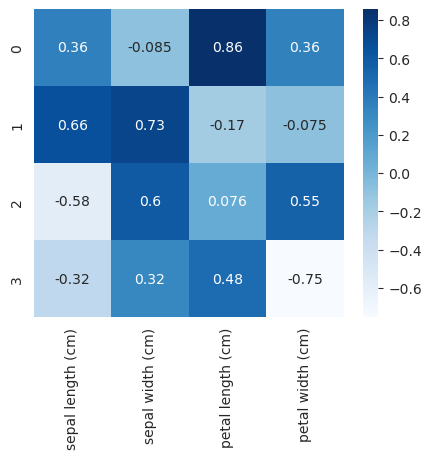

In [121]:
sb.heatmap(comps, cmap="Blues", annot=True)

In [124]:
! pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 434.6 kB/s eta 0:00:00m eta 0:00:010:00:01
